In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df_t=pd.read_csv("test.csv")

In [4]:
df_t_copy=pd.read_csv("test.csv")

In [5]:
#show all columns
pd.set_option('display.max_columns', None)

EDA
1. Check introductory details about Data

In [6]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,187,37,125591,2013-08-08,IN,500/1000,1000,1412.06,5000000,450947,FEMALE,Masters,protective-serv,reading,not-in-family,60100,0,2015-01-16,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,NC,Riverwood,7082 Oak Ridge,21,1,?,0,3,?,57700,5770,5770,46160,Nissan,Maxima,2000,0,NaN
1,243,44,967713,1997-12-25,IL,250/500,500,809.11,0,600208,MALE,JD,craft-repair,polo,other-relative,33200,0,2015-01-27,Multi-vehicle Collision,Side Collision,Minor Damage,Other,NC,Springfield,9352 Washington Ave,4,3,?,2,1,YES,51400,5140,10280,35980,Honda,Civic,1996,0,NaN
2,24,33,649082,1996-01-19,IL,500/1000,1000,1922.84,0,431277,FEMALE,High School,machine-op-inspct,skydiving,wife,0,-45200,2015-01-24,Single Vehicle Collision,Side Collision,Total Loss,Police,WV,Northbend,5061 Francis Ave,0,1,?,2,1,NO,46800,4680,9360,32760,Jeep,Wrangler,2002,0,NaN
3,215,42,519312,2008-10-28,OH,500/1000,500,1848.81,0,435489,MALE,JD,transport-moving,video-games,own-child,0,-49000,2015-02-06,Multi-vehicle Collision,Front Collision,Major Damage,Fire,WV,Northbend,2457 Washington Ave,20,3,YES,2,2,YES,68520,11420,5710,51390,Suburu,Legacy,2003,1,NaN
4,85,30,190588,2001-12-09,OH,100/300,1000,796.35,0,614166,FEMALE,MD,craft-repair,video-games,own-child,72400,-77000,2015-02-20,Multi-vehicle Collision,Rear Collision,Total Loss,Fire,SC,Northbend,2290 4th Ave,9,3,YES,2,1,YES,58960,5360,10720,42880,Ford,F150,2004,0,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           700 non-null    int64  
 1   age                          700 non-null    int64  
 2   policy_number                700 non-null    int64  
 3   policy_bind_date             700 non-null    object 
 4   policy_state                 700 non-null    object 
 5   policy_csl                   700 non-null    object 
 6   policy_deductable            700 non-null    int64  
 7   policy_annual_premium        700 non-null    float64
 8   umbrella_limit               700 non-null    int64  
 9   insured_zip                  700 non-null    int64  
 10  insured_sex                  700 non-null    object 
 11  insured_education_level      700 non-null    object 
 12  insured_occupation           700 non-null    object 
 13  insured_hobbies     

statistical insight

In [8]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39
count,700.000000,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,700.000000,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,0.0
mean,205.894286,39.105714,549242.077143,1147.857143,1245.976271,1.100000e+06,501432.612857,25804.857143,-26228.00000,11.642857,1.870000,0.994286,1.477143,52475.685714,7463.257143,7324.142857,37688.285714,2004.931429,0.258571,NaN
std,116.018709,9.166258,258480.463210,611.579706,248.310901,2.282922e+06,72210.251502,28043.400441,28422.99164,6.964524,1.035265,0.818227,1.113472,26115.219702,4890.609140,4778.111003,18695.686555,5.983371,0.438163,NaN
min,0.000000,20.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.00000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,0.000000,NaN
25%,114.000000,32.000000,343282.750000,500.000000,1077.460000,0.000000e+00,447978.250000,0.000000,-51275.00000,5.000000,1.000000,0.000000,0.000000,41662.500000,4265.000000,4420.000000,29872.500000,2000.000000,0.000000,NaN
50%,202.000000,38.000000,536799.000000,1000.000000,1252.280000,0.000000e+00,466242.000000,11550.000000,-15650.00000,12.000000,1.000000,1.000000,1.000000,57710.000000,6820.000000,6685.000000,41760.000000,2005.000000,0.000000,NaN
75%,279.000000,45.000000,757918.000000,2000.000000,1402.757500,0.000000e+00,603946.000000,51400.000000,0.00000,17.000000,3.000000,2.000000,2.000000,70072.500000,11235.000000,10825.000000,50417.500000,2010.000000,1.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.00000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000,NaN


In [9]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39
months_as_customer,1.000000,0.923407,0.043929,0.042521,0.038047,0.018496,0.008867,-0.023711,0.033338,0.092587,0.021706,-0.029785,0.008309,0.060700,0.046336,0.028271,0.065443,-0.033850,0.005576,NaN
age,0.923407,1.000000,0.038344,0.054627,0.045847,0.016380,0.010234,-0.037853,0.015532,0.099397,0.032506,-0.053519,0.000517,0.058549,0.053464,0.041653,0.057154,-0.018309,-0.002185,NaN
policy_number,0.043929,0.038344,1.000000,-0.012189,0.016328,0.007751,-0.014799,-0.013142,-0.006241,0.013347,0.016548,0.019609,0.011709,-0.029625,-0.032216,-0.000271,-0.032885,-0.014742,-0.011383,NaN
policy_deductable,0.042521,0.054627,-0.012189,1.000000,0.023158,0.002203,0.016677,-0.003499,-0.013555,0.064644,0.059776,-0.028327,0.021251,0.040240,0.047598,0.103140,0.017398,0.037374,0.051987,NaN
policy_annual_premium,0.038047,0.045847,0.016328,0.023158,1.000000,0.018448,0.012433,-0.016571,0.002409,0.021716,-0.044385,0.024757,-0.008546,0.045899,0.012927,0.020280,0.055549,-0.022564,0.000530,NaN
umbrella_limit,0.018496,0.016380,0.007751,0.002203,0.018448,1.000000,-0.004283,-0.045585,-0.043441,-0.010348,-0.036258,0.018687,-0.045812,-0.049799,-0.059000,-0.018352,-0.049438,-0.005677,0.031321,NaN
insured_zip,0.008867,0.010234,-0.014799,0.016677,0.012433,-0.004283,1.000000,0.056269,0.068903,0.001667,0.041192,0.035857,0.006303,-0.013304,0.006935,-0.003806,-0.019425,-0.029008,0.031005,NaN
capital-gains,-0.023711,-0.037853,-0.013142,-0.003499,-0.016571,-0.045585,0.056269,1.000000,-0.016225,-0.063829,0.062455,0.058527,-0.059286,0.029016,0.042822,0.015536,0.025359,0.028190,-0.040945,NaN
capital-loss,0.033338,0.015532,-0.006241,-0.013555,0.002409,-0.043441,0.068903,-0.016225,1.000000,-0.044675,-0.007723,0.002411,-0.022473,-0.050009,-0.064660,-0.044967,-0.041449,-0.066795,-0.017729,NaN
incident_hour_of_the_day,0.092587,0.099397,0.013347,0.064644,0.021716,-0.010348,0.001667,-0.063829,-0.044675,1.000000,0.090776,-0.009647,0.005218,0.219950,0.176422,0.180144,0.215049,0.039819,0.014834,NaN


In [10]:
df.corr() > 0.75

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39
months_as_customer,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
age,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
policy_number,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
policy_deductable,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
policy_annual_premium,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
umbrella_limit,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
insured_zip,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
capital-gains,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
capital-loss,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
incident_hour_of_the_day,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [11]:
#sns.pairplot(df,hue = 'fraud_reported')

# #get numerical columns and categorical columns
DataFrame.select_dtypes(include=None, exclude=None)


In [12]:
df_num = df.select_dtypes(exclude = 'object')

In [13]:
#sns.pairplot(df_num)

In [14]:
df_cat = df.select_dtypes(include = 'object')

In [15]:
df_num.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [16]:
df_cat.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

(array([349.,   8.,  25.,  57.,  73.,  88.,  61.,  24.,  12.,   3.]),
 array([     0.,  10050.,  20100.,  30150.,  40200.,  50250.,  60300.,
         70350.,  80400.,  90450., 100500.]),
 <a list of 10 Patch objects>)

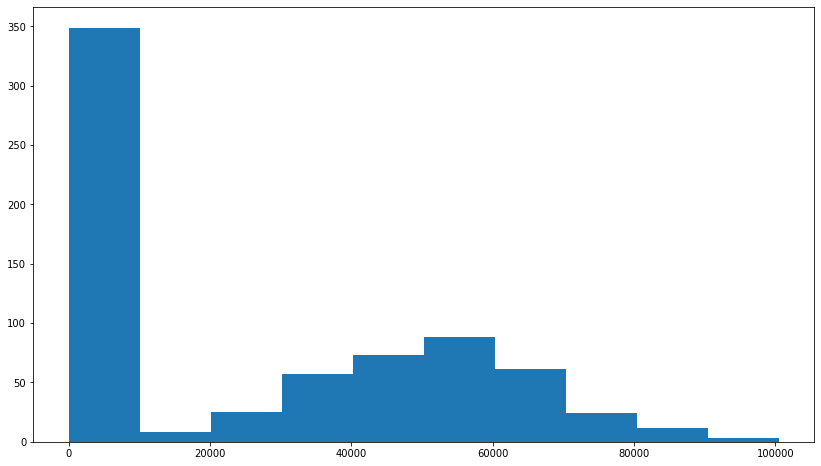

In [17]:
plt.figure(figsize=(14,8))
plt.hist(df['capital-gains'])

Use boxplot by fraud_reported for numerical variables.

In [18]:
df['fraud_reported'].value_counts()

0    519
1    181
Name: fraud_reported, dtype: int64

In [19]:
# for i in df_num:
#   plt.figure(figsize=(14,12))
#   ax = sns.boxplot(x='fraud_reported',y=i, data =df);
#   ax = sns.swarmplot(x='fraud_reported',y=i, data =df, color=".25")
#   plt.show()

In [20]:
# for i in df_num:
#   plt.hist(df_num[i])
#   plt.title(i)
#   plt.show()

In [21]:
# for i in df_num:
#   fig = plt.figure(figsize = (14, 8))
#   sns.countplot(x=i, hue='fraud_reported', data=df)
#   plt.show()

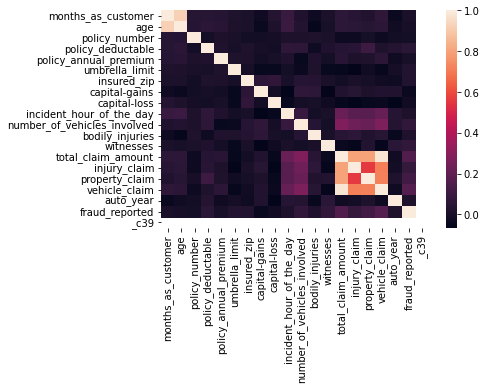

In [22]:
sns.heatmap(df_num.corr())

In [23]:
# for i in df_cat.columns:
#   plt.figure(figsize=(16,10))
#   sns.barplot(df[i].value_counts().index, df[i].value_counts()).set_title(i)
#   plt.show()

# ***Feature engineering***

In [24]:
#Drop the last column with 0 value there
#Looks like there is no missing values. Ok, a lot of "?", we will need to deal with it.
df.drop(["_c39"],axis=1,inplace=True)


In [25]:
df_t.drop(["_c39"],axis=1,inplace=True)

In [26]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

**Columns can be droped: **
policy_number, insured_zip, incident_location, total_clain_amount(dependent)

**Columns can be featured: **
**policy_bind_date, incident date, auto year**
calculate the time the client hold the insurance, the shorter, the more likely he would fraud(hypothesis)
New_time_1 = incident date - policy_bind_date
New_time_2 = incident date(Year) = auto year


Umbrelle_limit: Need to be scaled. it's more like a have or not. But we might need to do feature scaling anyway.

policy_csl: split and take one (the first) of the value.

**Need to check** insured_hobbies, insured_occupation, incident_city, incidenthouroftheday,

**Can be combined** capital gain or lose


In [27]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,187,37,125591,2013-08-08,IN,500/1000,1000,1412.06,5000000,450947,FEMALE,Masters,protective-serv,reading,not-in-family,60100,0,2015-01-16,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,NC,Riverwood,7082 Oak Ridge,21,1,?,0,3,?,57700,5770,5770,46160,Nissan,Maxima,2000,0
1,243,44,967713,1997-12-25,IL,250/500,500,809.11,0,600208,MALE,JD,craft-repair,polo,other-relative,33200,0,2015-01-27,Multi-vehicle Collision,Side Collision,Minor Damage,Other,NC,Springfield,9352 Washington Ave,4,3,?,2,1,YES,51400,5140,10280,35980,Honda,Civic,1996,0
2,24,33,649082,1996-01-19,IL,500/1000,1000,1922.84,0,431277,FEMALE,High School,machine-op-inspct,skydiving,wife,0,-45200,2015-01-24,Single Vehicle Collision,Side Collision,Total Loss,Police,WV,Northbend,5061 Francis Ave,0,1,?,2,1,NO,46800,4680,9360,32760,Jeep,Wrangler,2002,0
3,215,42,519312,2008-10-28,OH,500/1000,500,1848.81,0,435489,MALE,JD,transport-moving,video-games,own-child,0,-49000,2015-02-06,Multi-vehicle Collision,Front Collision,Major Damage,Fire,WV,Northbend,2457 Washington Ave,20,3,YES,2,2,YES,68520,11420,5710,51390,Suburu,Legacy,2003,1
4,85,30,190588,2001-12-09,OH,100/300,1000,796.35,0,614166,FEMALE,MD,craft-repair,video-games,own-child,72400,-77000,2015-02-20,Multi-vehicle Collision,Rear Collision,Total Loss,Fire,SC,Northbend,2290 4th Ave,9,3,YES,2,1,YES,58960,5360,10720,42880,Ford,F150,2004,0


Replace "?" by "N"

In [28]:
df[df=="?"].count()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 123
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                259
bodily_injuries     

In [29]:
df_t[df=="?"].count()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                  56
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                111
bodily_injuries     

In [30]:
df.replace("?","N",inplace=True)
df_t.replace("?","N",inplace=True)

split policy_csl and take only one of the value

In [31]:
df['policy_csl'] = df['policy_csl'].str.split("/",expand = True)[0]

In [32]:
df_t['policy_csl'] = df_t['policy_csl'].str.split("/",expand = True)[0]

#dealing with dates

the time period from policy to incidents

In [33]:
df["policy_bind_date"]=pd.to_datetime(df["policy_bind_date"])
df_t["policy_bind_date"]=pd.to_datetime(df_t["policy_bind_date"])

In [34]:
df["incident_date"]=pd.to_datetime(df["incident_date"])
df_t["incident_date"]=pd.to_datetime(df_t["incident_date"])

In [35]:
df["incident_date"]

0     2015-01-16
1     2015-01-27
2     2015-01-24
3     2015-02-06
4     2015-02-20
         ...    
695   2015-01-08
696   2015-01-18
697   2015-02-23
698   2015-02-03
699   2015-01-18
Name: incident_date, Length: 700, dtype: datetime64[ns]

In [36]:
df['safeTime'] = (((df['incident_date'] - df["policy_bind_date"])/np.timedelta64(1,'D')).astype(int))/30
df_t['safeTime'] = (((df_t['incident_date'] - df_t["policy_bind_date"])/np.timedelta64(1,'D')).astype(int))/30

In [37]:
df['safeTime'].astype(int)
df_t['safeTime'].astype(int)

0      147
1      255
2      231
3      275
4      221
      ... 
295    188
296     62
297    191
298     53
299    295
Name: safeTime, Length: 300, dtype: int64

How old is the car when incidents happend

In [38]:
df['inci_year']=df['incident_date'].dt.year
df_t['inci_year']=df_t['incident_date'].dt.year

In [39]:
df_t['inci_year'].value_counts()

2015    300
Name: inci_year, dtype: int64

In [40]:
df['carAge']=df['inci_year']-df['auto_year']
df_t['carAge']=df_t['inci_year']-df_t['auto_year']

In [41]:
df_t['carAge']

0       9
1       7
2       6
3       3
4      12
       ..
295    13
296    16
297    18
298     3
299    17
Name: carAge, Length: 300, dtype: int64

the age of the car til now --> no need since all the accidents happend in 2015

In [42]:
#df['TodayAge']=2022-df['auto_year']
#df_t['TodayAge']=2022-df_t['auto_year']

In [43]:
#Drop colums policy_number, insured_zip, incident_location, total_claim_amount(dependent)
df.drop(["policy_number","insured_zip","incident_location","total_claim_amount"], axis=1,inplace=True)
df_t.drop(["policy_number","insured_zip","incident_location","total_claim_amount"], axis=1,inplace=True)

In [44]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,safeTime,inci_year,carAge
0,187,37,2013-08-08,IN,500,1000,1412.06,5000000,FEMALE,Masters,protective-serv,reading,not-in-family,60100,0,2015-01-16,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,NC,Riverwood,21,1,N,0,3,N,5770,5770,46160,Nissan,Maxima,2000,0,17.533333,2015,15
1,243,44,1997-12-25,IL,250,500,809.11,0,MALE,JD,craft-repair,polo,other-relative,33200,0,2015-01-27,Multi-vehicle Collision,Side Collision,Minor Damage,Other,NC,Springfield,4,3,N,2,1,YES,5140,10280,35980,Honda,Civic,1996,0,208.066667,2015,19
2,24,33,1996-01-19,IL,500,1000,1922.84,0,FEMALE,High School,machine-op-inspct,skydiving,wife,0,-45200,2015-01-24,Single Vehicle Collision,Side Collision,Total Loss,Police,WV,Northbend,0,1,N,2,1,NO,4680,9360,32760,Jeep,Wrangler,2002,0,231.500000,2015,13
3,215,42,2008-10-28,OH,500,500,1848.81,0,MALE,JD,transport-moving,video-games,own-child,0,-49000,2015-02-06,Multi-vehicle Collision,Front Collision,Major Damage,Fire,WV,Northbend,20,3,YES,2,2,YES,11420,5710,51390,Suburu,Legacy,2003,1,76.400000,2015,12
4,85,30,2001-12-09,OH,100,1000,796.35,0,FEMALE,MD,craft-repair,video-games,own-child,72400,-77000,2015-02-20,Multi-vehicle Collision,Rear Collision,Total Loss,Fire,SC,Northbend,9,3,YES,2,1,YES,5360,10720,42880,Ford,F150,2004,0,160.700000,2015,11


In [45]:
df['incident_city'].value_counts()

Springfield    117
Arlington      110
Columbus       108
Northbend       96
Hillsdale       96
Riverwood       90
Northbrook      83
Name: incident_city, dtype: int64

In [46]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'safeTime', 'inci_year', 'carAge'],
      dtype='object')

In [47]:
#drop the old date columns
df.drop(["policy_bind_date","incident_date","auto_year","inci_year"], axis=1,inplace=True)
df_t.drop(["policy_bind_date","incident_date","auto_year","inci_year"], axis=1,inplace=True)

In [48]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,safeTime,carAge
0,187,37,IN,500,1000,1412.06,5000000,FEMALE,Masters,protective-serv,reading,not-in-family,60100,0,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,NC,Riverwood,21,1,N,0,3,N,5770,5770,46160,Nissan,Maxima,0,17.533333,15
1,243,44,IL,250,500,809.11,0,MALE,JD,craft-repair,polo,other-relative,33200,0,Multi-vehicle Collision,Side Collision,Minor Damage,Other,NC,Springfield,4,3,N,2,1,YES,5140,10280,35980,Honda,Civic,0,208.066667,19
2,24,33,IL,500,1000,1922.84,0,FEMALE,High School,machine-op-inspct,skydiving,wife,0,-45200,Single Vehicle Collision,Side Collision,Total Loss,Police,WV,Northbend,0,1,N,2,1,NO,4680,9360,32760,Jeep,Wrangler,0,231.500000,13
3,215,42,OH,500,500,1848.81,0,MALE,JD,transport-moving,video-games,own-child,0,-49000,Multi-vehicle Collision,Front Collision,Major Damage,Fire,WV,Northbend,20,3,YES,2,2,YES,11420,5710,51390,Suburu,Legacy,1,76.400000,12
4,85,30,OH,100,1000,796.35,0,FEMALE,MD,craft-repair,video-games,own-child,72400,-77000,Multi-vehicle Collision,Rear Collision,Total Loss,Fire,SC,Northbend,9,3,YES,2,1,YES,5360,10720,42880,Ford,F150,0,160.700000,11


# **create dummy variables for categorical**

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [50]:
df_cat = df.select_dtypes(include = 'object')
df_t_cat = df_t.select_dtypes(include = 'object')

In [51]:
df_num = df.select_dtypes(exclude = 'object')
df_t_num = df_t.select_dtypes(exclude = 'object')

In [52]:
df_cat.columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

In [53]:
df_cat['insured_education_level'].value_counts()

JD             120
High School    105
Associate      105
Masters         99
MD              93
College         91
PhD             87
Name: insured_education_level, dtype: int64

In [54]:
for i in df_cat.columns:
  dum = pd.get_dummies(df[i],prefix=i)
  df = pd.concat([df,dum],axis=1)

In [55]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,safeTime,carAge,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100,policy_csl_250,policy_csl_500,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_N,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_N,property_damage_NO,property_damage_YES,police_report_available_N,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,187,37,IN,500,1000,1412.06,5000000,FEMALE,Masters,protective-serv,reading,not-in-family,60100,0,Single Vehicle Colli

In [56]:
for i in df_t_cat.columns:
  dum_t = pd.get_dummies(df_t[i],prefix=i)
  df_t = pd.concat([df_t,dum_t],axis=1)

In [57]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       ...
       'auto_model_Pathfinder', 'auto_model_RAM', 'auto_model_RSX',
       'auto_model_Silverado', 'auto_model_TL', 'auto_model_Tahoe',
       'auto_model_Ultima', 'auto_model_Wrangler', 'auto_model_X5',
       'auto_model_X6'],
      dtype='object', length=179)

Check if they have the same columns after transformation

In [58]:
l1 = df.columns.tolist()
l2 = df_t.columns.tolist()

In [59]:

set(l1)-set(l2)

{'fraud_reported'}

In [60]:
df_num

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,fraud_reported,safeTime,carAge
0,187,37,1000,1412.06,5000000,60100,0,21,1,0,3,5770,5770,46160,0,17.533333,15
1,243,44,500,809.11,0,33200,0,4,3,2,1,5140,10280,35980,0,208.066667,19
2,24,33,1000,1922.84,0,0,-45200,0,1,2,1,4680,9360,32760,0,231.500000,13
3,215,42,500,1848.81,0,0,-49000,20,3,2,2,11420,5710,51390,1,76.400000,12
4,85,30,1000,796.35,0,72400,-77000,9,3,2,1,5360,10720,42880,0,160.700000,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,199,37,500,1262.08,0,48500,0,4,1,0,3,10940,10940,38290,1,212.466667,4
696,232,43,500,1483.91,8000000,0,-33600,17,3,0,1,7060,14120,49420,1,166.500000,2
697,215,37,500,1632.93,0,0,-42900,7,3,2,0,9520,4760,42840,0,148.000000,13
698,270,44,2000,1030.95,0,47200,0,20,3,1,0,7180,3590,25130,1,141.033333,8


In [61]:
catlist = df_cat.columns

In [62]:
#drop the old objects
df = df.drop(catlist,axis = 1)

In [63]:
df_t = df_t.drop(catlist,axis = 1)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Columns: 162 entries, months_as_customer to auto_model_X6
dtypes: float64(2), int64(15), uint8(145)
memory usage: 192.2 KB


In [65]:
X = df.loc[:,df.columns != 'fraud_reported']
y=df.fraud_reported

Feature scaling

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
df_t = scaler.fit_transform(df_t)

In [68]:
X_scaled

array([[-0.16297196, -0.2298888 , -0.24193554, ..., -0.21526221,
        -0.13756036, -0.13206764],
       [ 0.32005396,  0.53432769, -1.06007506, ..., -0.21526221,
        -0.13756036, -0.13206764],
       [-1.56892239, -0.66658393, -0.24193554, ...,  4.6454973 ,
        -0.13756036, -0.13206764],
       ...,
       [ 0.078541  , -0.2298888 , -1.06007506, ..., -0.21526221,
        -0.13756036, -0.13206764],
       [ 0.55294145,  0.53432769,  1.39434349, ..., -0.21526221,
        -0.13756036, -0.13206764],
       [ 0.54431599,  0.64350148, -1.06007506, ..., -0.21526221,
        -0.13756036, -0.13206764]])

In [69]:
df_t

array([[ 2.47748852,  2.36193755, -0.17712092, ..., -0.19509558,
        -0.18569534, -0.11624764],
       [-0.28735464, -0.28449108, -0.17712092, ..., -0.19509558,
        -0.18569534, -0.11624764],
       [-0.4557265 , -0.28449108, -0.17712092, ..., -0.19509558,
        -0.18569534, -0.11624764],
       ...,
       [ 0.45702621,  0.0463125 ,  1.45784144, ..., -0.19509558,
        -0.18569534, -0.11624764],
       [-1.28872412, -0.39475894, -0.9946021 , ..., -0.19509558,
        -0.18569534, -0.11624764],
       [-0.39369476, -0.5050268 , -0.9946021 , ..., -0.19509558,
        -0.18569534, -0.11624764]])

Resample for inbalanced data set


In [70]:
y.value_counts()

0    519
1    181
Name: fraud_reported, dtype: int64

In [71]:
#use smote method to oversampleing
# from imblearn.over_sampling import SMOTENC
# smote_nc = SMOTENC(categorical_features= catlist, random_state=0)
# X_resampled, y_resampled = smote_nc.fit_resample(X, y)

In [72]:
#use random oversampling
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

In [73]:
ros = RandomOverSampler(random_state=42)

In [74]:
X_res, y_res = ros.fit_resample(X_scaled, y)

In [75]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 519, 1: 519})


Split the dataset into train-test sets

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=2)

In [78]:
print(X.shape, X_train.shape, X_test.shape)

(700, 161) (830, 161) (208, 161)


# ***Try different models***

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [80]:
lr = LogisticRegression()

In [81]:
# Training the Logistic Regression model with training data
lr.fit(X_train, y_train)

LogisticRegression()

Logistic regression is not performing well since the data set is small with a lot of features

In [82]:
# Accuracy on training data
y_prediction = lr.predict(X_test)

In [83]:
training_data_accuracy = accuracy_score(y_test, y_prediction)
training_data_accuracy

0.8076923076923077

In [84]:
confusion_matrix(y_test, y_prediction)

array([[73, 23],
       [17, 95]])

Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [87]:
y_tree_prediction = clf.predict(X_test)

In [88]:
training_data_accuracy = accuracy_score(y_test, y_tree_prediction)
training_data_accuracy

0.8894230769230769

In [89]:
confusion_matrix(y_test, y_tree_prediction)

array([[ 80,  16],
       [  7, 105]])

Decision tree might be overfitting

Try randomforest model which will prevent overfitting

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
forest = RandomForestClassifier(criterion='gini', n_estimators=5,random_state=1, n_jobs=2)

In [92]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

In [93]:
y_rf_pred = forest.predict(X_test)

In [94]:
training_data_accuracy = accuracy_score(y_test, y_rf_pred)
training_data_accuracy

0.8653846153846154

In [95]:
confusion_matrix(y_test, y_rf_pred)

array([[81, 15],
       [13, 99]])

XGboost


In [96]:
import xgboost as xgb

In [97]:
# fit model no training data
XGmodel = XGBClassifier()

In [98]:
XGmodel.fit(X_train, y_train)

XGBClassifier()

In [99]:
# make predictions for test data
y_xg_pred = XGmodel.predict(X_test)

In [100]:
training_data_accuracy = accuracy_score(y_test, y_xg_pred)
training_data_accuracy

0.8942307692307693

In [101]:
confusion_matrix(y_test, y_xg_pred)

array([[ 80,  16],
       [  6, 106]])

SVM

In [115]:
from sklearn.svm import SVC 
svc = SVC(kernel='linear')

In [116]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [117]:
y_svc_pred = svc.predict(X_test)

In [118]:
training_data_accuracy = accuracy_score(y_test, y_svc_pred)
training_data_accuracy

0.8413461538461539

In [119]:
confusion_matrix(y_test, y_svc_pred)

array([[80, 16],
       [17, 95]])

Use the model on the real test data for the competition

In [102]:
#feature scaling for test data
df_t_scaled = scaler.fit_transform(df_t)

In [103]:
#Random forest

In [104]:
y_rf = forest.predict(df_t_scaled)

In [105]:
y_rf

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0])

XGboost

In [106]:
X_test


array([[ 1.45861504,  1.1893704 , -0.24193554, ..., -0.21526221,
        -0.13756036, -0.13206764],
       [-0.84438352, -0.66658393,  1.39434349, ..., -0.21526221,
        -0.13756036, -0.13206764],
       [ 1.77775717,  1.8444131 , -1.06007506, ..., -0.21526221,
        -0.13756036, -0.13206764],
       ...,
       [ 0.32005396,  0.53432769, -1.06007506, ..., -0.21526221,
        -0.13756036, -0.13206764],
       [-0.62012149, -0.33906258, -0.24193554, ..., -0.21526221,
        -0.13756036, -0.13206764],
       [ 1.08772014,  0.86184905,  1.39434349, ..., -0.21526221,
        -0.13756036, -0.13206764]])

In [107]:
df_t_scaled

array([[ 2.47748852,  2.36193755, -0.17712092, ..., -0.19509558,
        -0.18569534, -0.11624764],
       [-0.28735464, -0.28449108, -0.17712092, ..., -0.19509558,
        -0.18569534, -0.11624764],
       [-0.4557265 , -0.28449108, -0.17712092, ..., -0.19509558,
        -0.18569534, -0.11624764],
       ...,
       [ 0.45702621,  0.0463125 ,  1.45784144, ..., -0.19509558,
        -0.18569534, -0.11624764],
       [-1.28872412, -0.39475894, -0.9946021 , ..., -0.19509558,
        -0.18569534, -0.11624764],
       [-0.39369476, -0.5050268 , -0.9946021 , ..., -0.19509558,
        -0.18569534, -0.11624764]])

In [108]:
y_xg = XGmodel.predict(df_t_scaled)

In [109]:
submission_rf= pd.DataFrame({'policy_number':df_t_copy['policy_number'],'fraud_reported':y_rf})

In [110]:
submission_rf

,policy_number,fraud_reported
0,698589,1
1,287489,1
2,211578,0
3,807369,0
4,830878,0
...,...,...
295,679370,0
296,272330,0
297,315631,0
298,445195,1


In [111]:
submission_xg= pd.DataFrame({'policy_number':df_t_copy['policy_number'],'fraud_reported':y_xg})

In [112]:
submission_xg

,policy_number,fraud_reported
0,698589,0
1,287489,0
2,211578,0
3,807369,0
4,830878,0
...,...,...
295,679370,0
296,272330,0
297,315631,0
298,445195,0


In [113]:
submission_rf.to_csv('submission_rf.csv', index=False)

In [114]:
submission_xg.to_csv('submission_xg.csv', index=False)